In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [38]:
apple = yf.download("AAPL", start="2014-01-01", end="2024-12-31")

C:\Users\rd357\AppData\Local\Temp\ipykernel_8560\3565857609.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start="2014-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [39]:
apple.reset_index(inplace=True)

In [40]:
apple

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-01-02,17.192822,17.314045,17.158320,17.272083,234684800
1,2014-01-03,16.815163,17.210535,16.798066,17.184426,392467600
2,2014-01-06,16.906860,16.996067,16.585775,16.705444,412610800
3,2014-01-07,16.785946,16.969955,16.720051,16.918980,317209200
4,2014-01-08,16.892246,16.957519,16.743982,16.747710,258529600
...,...,...,...,...,...,...
2762,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2763,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2764,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100


In [41]:
ma_100_days=apple.Close.rolling(100).mean()
ma_200_days=apple.Close.rolling(200).mean()

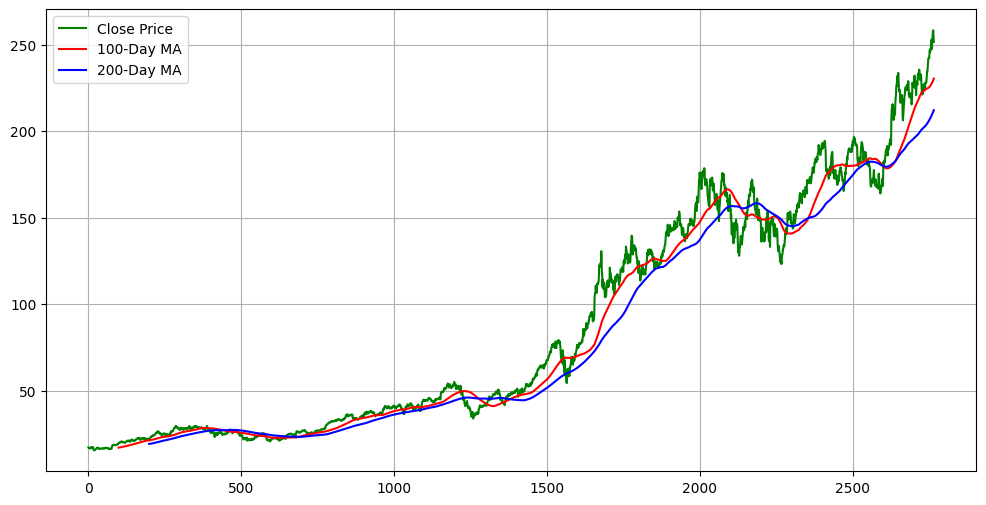

In [42]:
plt.figure(figsize=(12,6))
plt.plot(apple['Close'], label='Close Price', color='green')
plt.plot(ma_100_days, label='100-Day MA', color='red')
plt.plot(ma_200_days, label='200-Day MA', color='blue')
plt.legend()
plt.grid()
plt.show()

In [43]:
apple.dropna(inplace=True)

In [44]:
# apple_train= pd.DataFrame(apple.Close[0: int(len(apple)*0.80)])
# apple_test= pd.DataFrame(apple.Close[int(len(apple)*0.80): len(apple)])

In [45]:
apple_train = pd.DataFrame(apple['Close'][0: int(len(apple)*0.80)])
apple_train.columns = ['Close']

apple_test = pd.DataFrame(apple['Close'][int(len(apple)*0.80): len(apple)])
apple_test.columns = ['Close']


In [46]:
apple_train.shape[0]

2213

In [47]:
apple_test.shape[0]

554

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
training_data = apple_train.values 

scaler = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = scaler.fit_transform(training_data)

In [50]:
X_train = []
y_train = []

for i in range(60, len(training_data_scaled)):
    X_train.append(training_data_scaled[i-60:i, 0])  
    y_train.append(training_data_scaled[i, 0])       

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\rd357\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0115
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.0989e-04
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 5.1627e-04
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.5651e-04
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.7315e-04
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.3656e-04
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 4.4090e-04
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.3003e-04
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.8080e-04
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.1505e-04
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.4221e-04
Epoch 12/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.2570e-04
Epoch 13/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.4670e-04
Epoch 14/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.7964e-04
Epoch 15/20
68/68 ━

In [53]:
test_data = apple_test.values
total_data = pd.concat((apple_train['Close'], apple_test['Close']), axis=0).values
inputs = total_data[len(total_data) - len(apple_test) - 60:]
inputs = inputs.reshape(-1,1)
inputs_scaled = scaler.transform(inputs)

X_test = []
for i in range(60, len(inputs_scaled)):
    X_test.append(inputs_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_prices_scaled = model.predict(X_test)

# Convert back to original prices
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


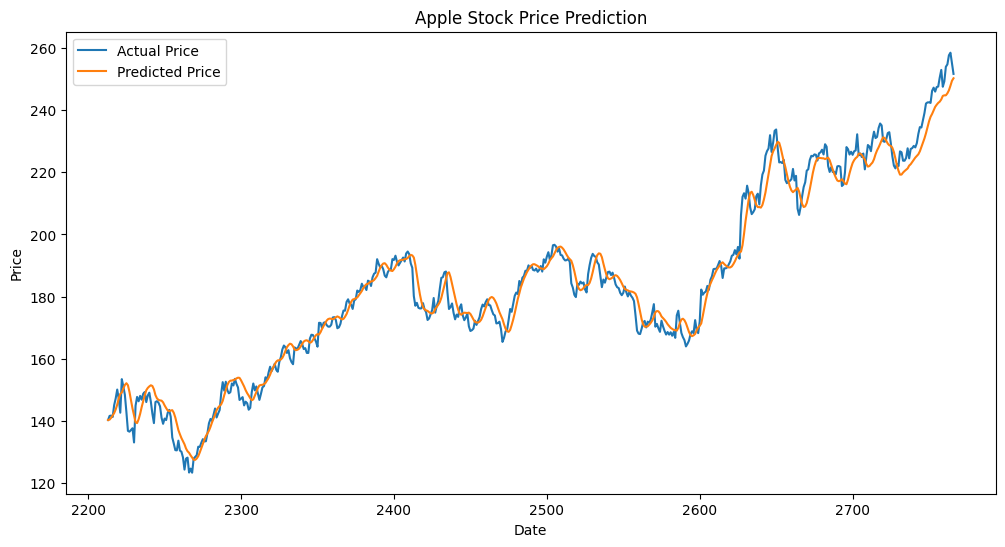

In [54]:
plt.figure(figsize=(12,6))
plt.plot(apple_test.index, apple_test['Close'], label='Actual Price')
plt.plot(apple_test.index, predicted_prices, label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()